In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
cc = pd.read_csv('Credit_Data_Original.csv')
cc.head(10)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,0
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,1
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,0
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,0
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,1
5,6,3,36,2,0,0,0,0,1,0,...,35,0,0,0,1,1,2,1,0,0
6,7,3,24,2,0,0,1,0,0,0,...,53,0,0,1,1,2,1,0,0,0
7,8,1,36,2,0,1,0,0,0,0,...,35,0,1,0,1,3,1,1,0,0
8,9,3,12,2,0,0,0,1,0,0,...,61,0,0,1,1,1,1,0,0,0
9,10,1,30,4,1,0,0,0,0,0,...,28,0,0,1,2,3,1,0,0,1


In [27]:
 # Assign X (data) and y (target)
X = cc[['JOB', 'RENT', 'EDUCATION']]
y = cc["DEFAULT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1000, 3) (1000, 1)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [30]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

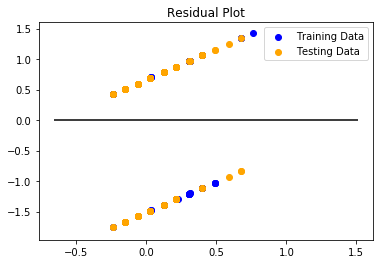

In [32]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()